# 40 - Clustering 4 Variables: K_Means con Scikit


* En este Notebook vamos a resolver un problema de ***Clusterización usando la librería de Scikit-Learn*** para el caso en el que tengamos datos con ***más de 2 variables***.


* Para resolver el problema de Clasificación vamos a utilizar la clase ***"KMeans()"***, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


* El ejemplo con el que vamos a trabajar, consiste en ***agrupar una serie de flores*** de las que sabemos ***los tamaños de su pétalo y sépalo (alto y ancho de ambos)***.


* El objetivo es ***encontrar 'K' Clusters que minimicen la Inercia*** (la suma de las distancias de cada elemento al centroide de su cluster):
<span></span><br><br>
<span style="font-size:20px">$$\underset{K}{argmin} \sum_{j=1}^{k}\sum_{x_i \in  c_j}\left \| x_i - \mu  \right \|^{2}$$</span>


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy](#M2)
<span></span><br>
    3. [Visualización de los datos](#M3)
<span></span><br>
    4. [Creacción del modelo (hipótesis) y ajuste](#M4)
<span></span><br>
    5. [Obtención del modelo (hipótesis)](#M5)
<span></span><br>
    6. [Visualización de los resultados](#M6)


##### Importante: En los problemas de clusterización no conocemos el dominio de salida, por lo que para el problema que se plantea no vamos a saber el tipo de flor, solo vamos a saber los tamaños de las flores.


* En primer lugar vamos a importar las librería necesarias:

<hr>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline 

<hr>


## <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/iris/iris_para_clustering.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas que nos interesan para el problema a resolver:
    - ***sepal_length***: El "largo" del Sépalo
    - ***sepal_width***: El "ancho" del Sépalo
    - ***petal_length***: El "largo" del Pétalo
    - ***petal_width***: El "ancho" del Pétalo


In [2]:
df = pd.read_csv("./data/iris/iris_para_clustering.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
68,6.2,2.2,4.5,1.5
53,5.5,2.3,4.0,1.3
82,5.8,2.7,3.9,1.2
148,6.2,3.4,5.4,2.3
46,5.1,3.8,1.6,0.2


<hr>


## <a name="M2">2. Cambio de estructura de datos a numpy
    
* Scikit necesita como entrada para el ajuste (o entrenamiento) de los modelos de Clustering los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.


* Por tanto, vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:


In [3]:
X = df.values   # Obtengo las 4 variables del DataFrame

<hr>


## <a name="M3">3. Visualización de los datos
    
* Vamos a pasar a ver la relación que hay entre cada par de variables para ver si podemos distinguir los grupos de elementos:


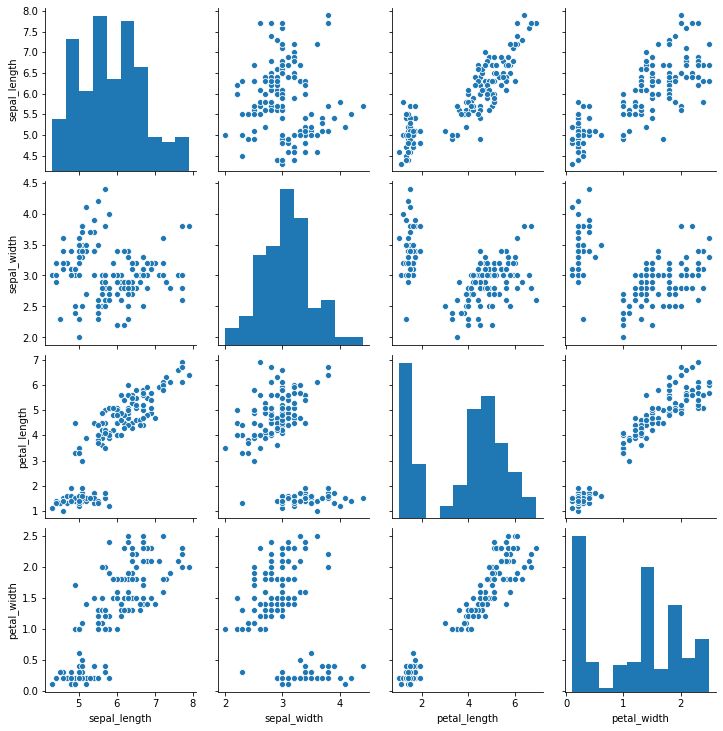

In [4]:
sns.pairplot(df)

<hr>


## <a name="M4">4. Creacción del modelo (hipótesis) y ajuste


* Vamos a realizar un Clustering y lo vamos a dividir en 3 grupos:

In [5]:
# Creamos un objeto de la clase "KMeans()"
kmeans = KMeans(n_clusters=3, max_iter=50, init="random")

# Ajustamos el modelo
kmeans.fit(X)

KMeans(init='random', max_iter=50, n_clusters=3)

<hr>


## <a name="M5">5. Obtención del modelo (hipótesis)


* Al estar realizando un ejercicio de Clustering en el que tenemos 4 variables no vamos a poder visalizar los resultados en 2D, por tanto vamos a interpretar la salida.


* Vamos a obtener los centroides de los Clusters y lo que vamos a concluir es que los valores de los centroides corresponden con el valor medio de la variables que tienen todos esos elementos del cluster.


* Veamos a continuación el valor medio de cada variable de los Clusters:

In [6]:
# Valores de los centroides
centroides = kmeans.cluster_centers_
df_centroides = pd.DataFrame(centroides, 
                             columns=['AVG_sepal_length', 'AVG_sepal_width', 'AVG_petal_length', 'AVG_petal_width'],
                             index=['Cluster {}'.format(index+1) for index, elem in enumerate(centroides)])
df_centroides.head()

,AVG_sepal_length,AVG_sepal_width,AVG_petal_length,AVG_petal_width
Cluster 1,6.850000,3.073684,5.742105,2.071053
Cluster 2,5.901613,2.748387,4.393548,1.433871
Cluster 3,5.006000,3.418000,1.464000,0.244000


<hr>


## <a name="M6">6. Visualización de los resultados
    

* Al tratarse de un problema de Clustering con más de dos variables, no podemos visualizar los resultados en 2D.


* Lo que si que podemos hacer es ver cual es la distribución de cada variable que tienen los elementos de cada cluster y así poder ver si variable a variable existen diferencias entre los Clusters.


* Para ello vamos a predecir; llamando al mátodo ***.predict()*** cual sería el cluster al que se le asigna a cada elemento.


* Teniendo etiquetados todos los elementos del dataset, dibujamos el histograma de cada una de las variables para cada Cluster y vemos si tienen distribuciones "distinguibles" entre ellas.


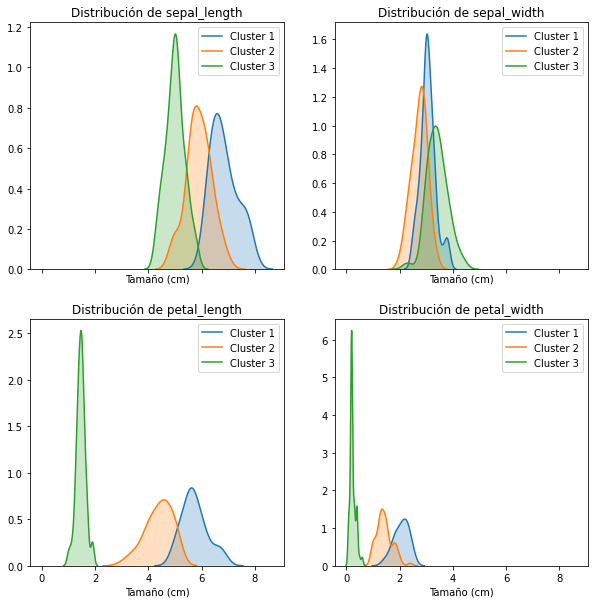

In [7]:
# importamos las librerías
import seaborn as sns
import matplotlib.pyplot as plt


# Obtenemos las etiqueta del cluster a la que se asigna cada elemento
labels = kmeans.labels_


# Añadimos una nueva columna en el DataFrame para indicar la etiqueta de cada elemento
df['label'] = labels
df['label'] = df['label'].apply(lambda x: 'Cluster {}'.format(x+1))


# Dibujamos las distribuciones de las 4 variables para cada uno de los Clusters
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
plt_position = [axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]]
for index, col in enumerate(df.columns.drop('label')):
    for i in np.sort(df['label'].unique()):
        df_plot = df[df['label'] == i][['label', col]] 
        sns.kdeplot(df_plot[col], shade=True, label=i, ax=plt_position[index])
    plt_position[index].title.set_text('Distribución de {}'.format(col))
    plt_position[index].set_xlabel('Tamaño (cm)')    


<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">